# Import Library 

In [1]:
# Lingkungan Python 3 ini dilengkapi dengan banyak pustaka analitik bermanfaat yang diinstal
# Ini ditentukan oleh gambar Docker kaggle/python: https://github.com/kaggle/docker-python
# Misalnya, berikut beberapa paket bermanfaat untuk dimuat

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Anda dapat menulis hingga 20GB ke direktori saat ini (/kaggle/working/) yang dipertahankan sebagai output saat Anda membuat versi menggunakan "Simpan & Jalankan Semua"
# Anda juga dapat menulis file sementara ke /kaggle/temp/, tetapi file tersebut tidak akan disimpan di luar sesi saat ini

## 1. Load Dataset

In [2]:
df_train = pd.read_csv('train_s3TEQDk.csv')
df_train['source']='train'
df_test = pd.read_csv('test_mSzZ8RL.csv')
df_test['source']='test'
df = pd.concat([df_train,df_test],ignore_index=True)

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


Setelah memuat dataset, langkah selanjutnya adalah memeriksa informasi tentang dataset dan membersihkan dataset yang meliputi pemeriksaan bentuk, tipe data, nilai unik, nilai nol.

In [4]:
#Checking columns of dataset
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'source'],
      dtype='object')

In [5]:
# Checking shape
df.shape

(351037, 12)

In [6]:
#Checking unique values 
df.nunique()

ID                     351037
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     2
source                      2
dtype: int64

In [7]:
# Check for null values
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [8]:
# Filling Null Values
df['Credit_Product']=df['Credit_Product'].fillna('NA')

+ Pengamatan: Kami menghapus semua nilai nol yang ada di dataset kami.

In [9]:
#Again check for null values
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [10]:
#Checking Datatypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       351037 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  object 
 10  Is_Lead              245725 non-null  float64
 11  source               351037 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 32.1+ MB


+ Di sini, kami menemukan bahwa fitur Is_Active memiliki dua nilai yaitu Ya dan Tidak. Jadi, kami harus mengubah nilai-nilai ini menjadi tipe data float.

In [11]:
#Changing Yes to 1 and No to 0 in Is_Active column to covert  data into float
df["Is_Active"].replace(["Yes","No"],[1,0],inplace=True)
df['Is_Active'] = df['Is_Active'].astype(float)

In [12]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,0.0,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,0.0,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,1.0,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,0.0,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,0.0,0.0,train


LabelEncoder mengacu pada konversi label ke dalam bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin . Ini adalah teknik pengkodean yang populer untuk menangani variabel kategoris.

### Using Label Encoder:

In [13]:
#Creating list of categorical columns
cat_col=[ 'Gender', 'Region_Code', 'Occupation','Channel_Code', 'Credit_Product']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()       #creating instance
for col in cat_col:
  df[col]= le.fit_transform(df[col])
df_2= df
df_2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,0,73,18,1,2,43,1,1045696,0.0,0.0,train
1,IDD62UNG,0,30,27,2,0,32,1,581988,0.0,0.0,train
2,HD3DSEMC,0,56,18,3,2,26,1,1484315,1.0,0.0,train
3,BF3NC7KV,1,34,20,2,0,19,1,470454,0.0,0.0,train
4,TEASRWXV,0,30,32,2,0,33,1,886787,0.0,0.0,train


Note :
+ Pada tabel tes dapat kita ketahui ada 2 kolom yg menurtut kita saat ini sudah tidak korerlative untuk analisa berikutnya dan siap di Drop yaitu ( ID dan Source)    

In [14]:
#Separating the train and test
df_train=df_2.loc[df_2["source"]=="train"]
df_test=df_2.loc[df_2["source"]=="test"]
df_1 = df_train

In [15]:
# we can drop column as they are irrelevant and have no effect on our data
df_1.drop(columns=['ID',"source"],inplace=True)
df_1.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,1045696,0.0,0.0
1,0,30,27,2,0,32,1,581988,0.0,0.0
2,0,56,18,3,2,26,1,1484315,1.0,0.0
3,1,34,20,2,0,19,1,470454,0.0,0.0
4,0,30,32,2,0,33,1,886787,0.0,0.0


+ Semua data sudah dalam bentuk numerik dn dapat kita lanjutkan tahapan visulasisasi data

# 2. Visualisasi data

## Univariate Analysis

In [58]:
# plotting libraries untuk mempercantik tampilan grafik
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 20,
          'figure.figsize': (30, 10),
          'axes.labelsize': 20,
          'axes.titlesize':20,
          'xtick.labelsize':20,
          'ytick.labelsize':20}

plt.rcParams.update(params)

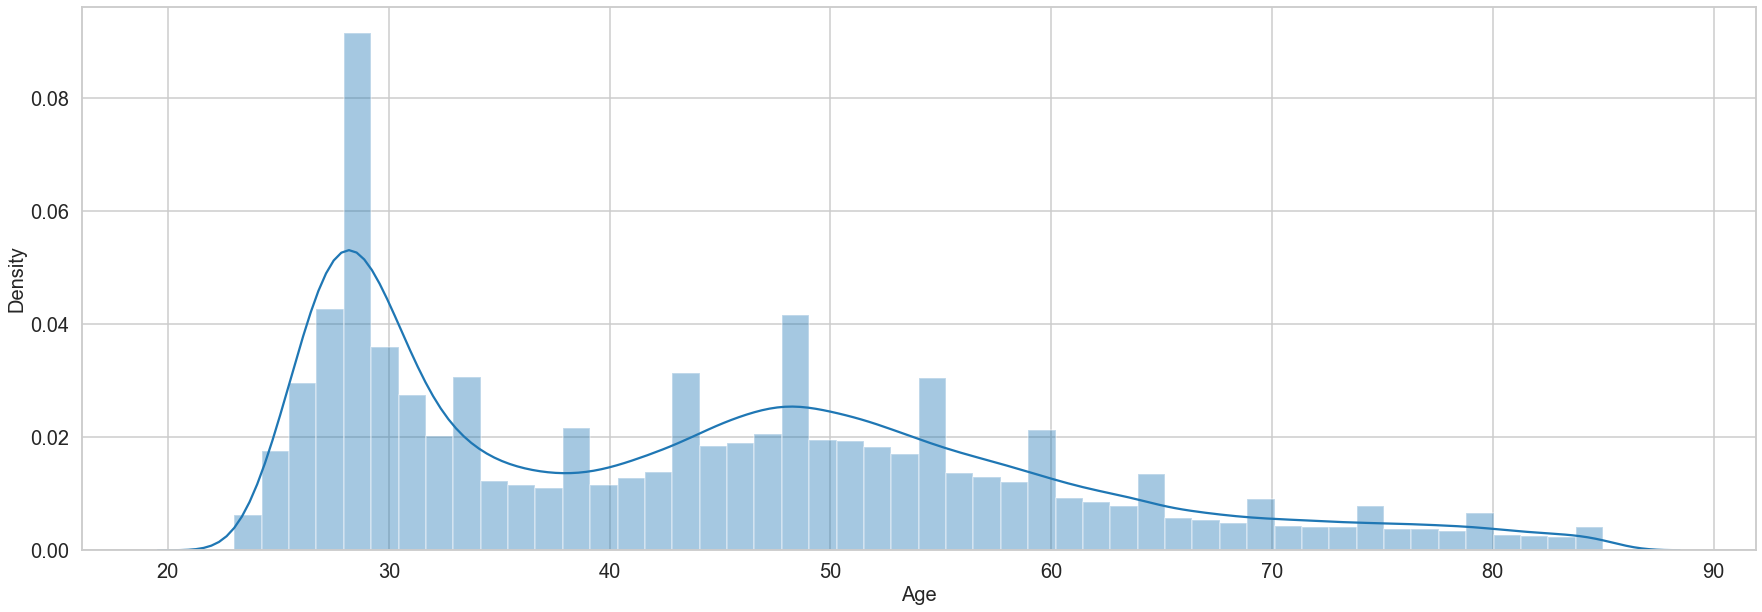

In [59]:
sns.distplot(df['Age']);

+ The  Distribusi Umur sedikit miring ke arah kiri yaitu “Positif Skew”.
+ Dalam hal ini, kita melihat bahwa satu kelompok usia lebih muda antara 20 hingga 40 tahun sementara yang lain berusia 40 hingga 60 tahun. Selain itu, mereka yang berusia antara 40 hingga 60 memiliki petunjuk sedangkan yang lebih muda tidak.
+ Jadi, ini bisa dikaitkan dengan variabel 'Vintage' yang akan lebih terlihat untuk kelompok usia yang lebih tinggi.

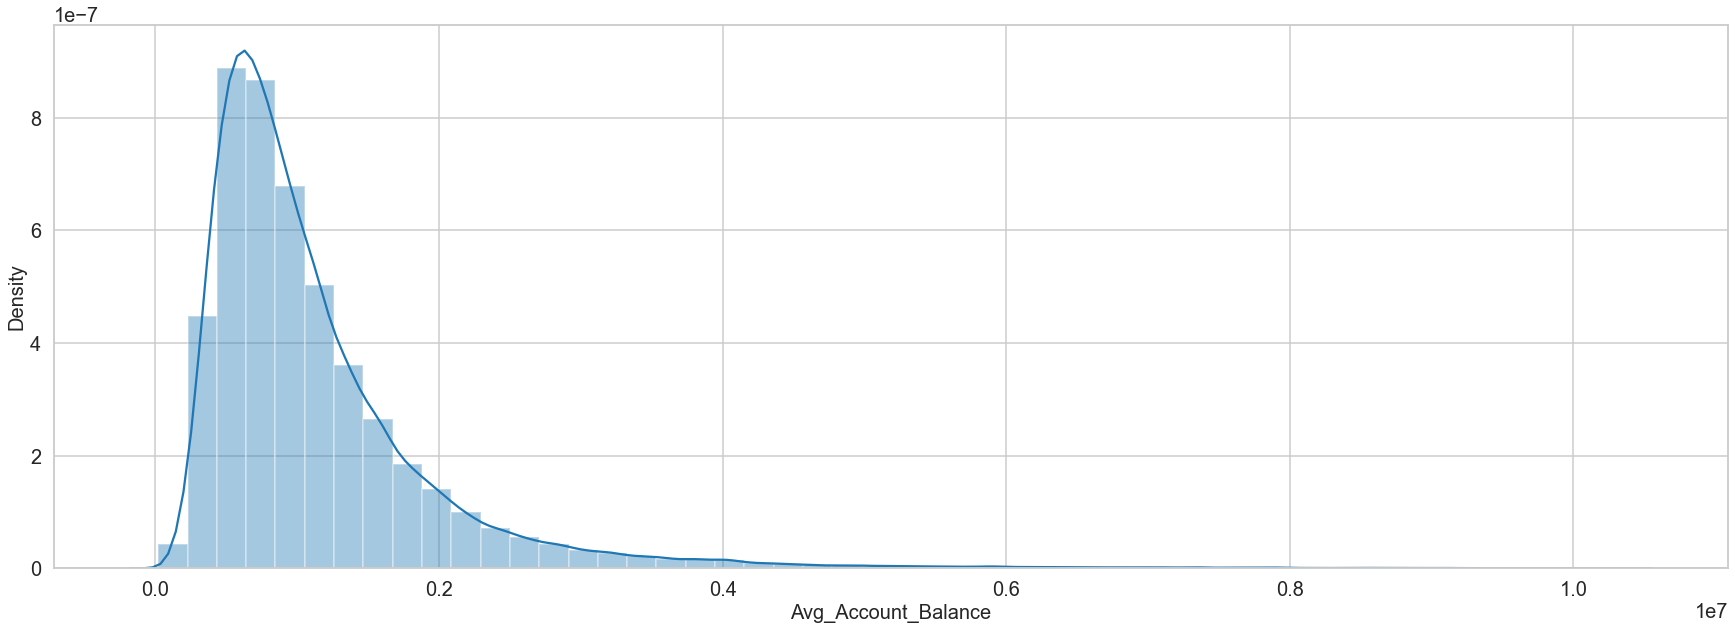

In [60]:
sns.distplot(df['Avg_Account_Balance'])
plt.show()

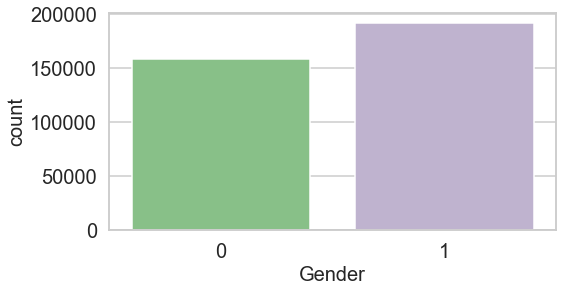

In [61]:
#Countplot for Gender feature 
plt.figure(figsize=(8,4))
sns.countplot(df['Gender'],palette='Accent')
plt.show()

+ Ada lebih banyak pelanggan pria yang hadir dalam dataset. Tetapi jenis kelamin pelanggan tidak terlalu penting dalam memutuskan siapa yang memiliki prospek yang lebih baik.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64


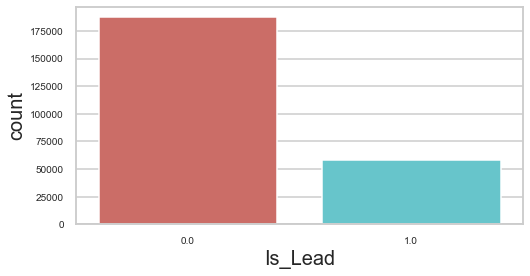

In [22]:
#Countplot for Target variable i.e 'Is_Lead'
target = 'Is_Lead'
plt.figure(figsize=(8,4))
sns.countplot(df[target],palette='hls')
print(df[target].value_counts())

+ Plot menunjukkan bahwa data sangat tidak seimbang dan perlu dikoreksi atau diseimbangkan sebelum menerapkan algoritma yang berbeda.
+ Untuk menyeimbangkan dataset kami menggunakan teknik undersampling pada langkah selanjutnya.

## Bivariate Analysis

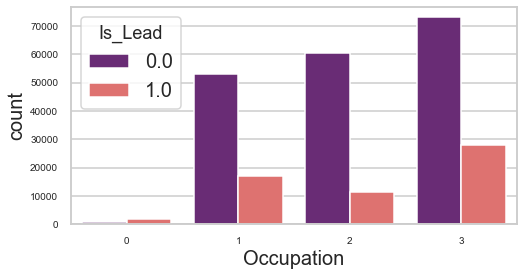

In [23]:
#Checking occupation with customers
plt.figure(figsize=(8,4))
sns.countplot(x='Occupation',hue='Is_Lead',data=df,palette= 'magma')
plt.show()

<Figure size 576x288 with 0 Axes>

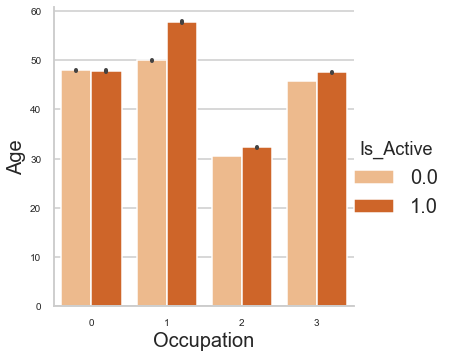

In [24]:
#Plot showing Activness of customer in last 3 months with respect to Occupation of customer
plt.figure(figsize=(8,4))
sns.catplot(y='Age',x='Occupation',hue='Is_Active',data=df,kind='bar',palette='Oranges')
plt.show()

# 3. Data Preparation :

## Resampling Data

In [25]:
# To balance the dataset , we will apply undersampling method
from sklearn.utils import resample
# separate the minority and majority classes
df_majority = df_1[df_1['Is_Lead']==0]
df_minority = df_1[df_1['Is_Lead']==1]

print(" The majority class values are", len(df_majority))
print(" The minority class values are", len(df_minority))
print(" The ratio of both classes are", len(df_majority)/len(df_minority))

 The majority class values are 187437
 The minority class values are 58288
 The ratio of both classes are 3.215704776283283


In [26]:
# undersample majority class
df_majority_undersampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=0)
# combine minority class with oversampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

df_undersampled['Is_Lead'].value_counts()
df_1=df_undersampled

# display new class value counts
print(" The undersamples class values count is:", len(df_undersampled))
print(" The ratio of both classes are", len(df_undersampled[df_undersampled["Is_Lead"]==0])/len(df_undersampled[df_undersampled["Is_Lead"]==1]))


 The undersamples class values count is: 116576
 The ratio of both classes are 1.0


In [27]:
# dropping target variable 
#assign the value of y for training and testing phase
xc = df_1.drop(columns=['Is_Lead'])
yc = df_1[["Is_Lead"]]

In [28]:
df_1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,1,62,32,1,2,20,0,1056750,1.0,1.0
15,1,33,18,3,1,69,0,517063,1.0,1.0
16,0,46,18,1,2,97,2,2282502,0.0,1.0
17,0,59,33,1,2,15,2,2384692,0.0,1.0
20,1,44,19,3,1,19,2,1001650,0.0,1.0


In [30]:
from sklearn.preprocessing import StandardScaler
#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_xc = pd.DataFrame(sc.fit_transform(xc),columns=xc.columns)

### #4. Classification Modelling :

In [31]:
#Importing necessary libraries
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
#defining a function to find fit of the model

def max_accuracy_scr(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    roc_scr_max=0
    train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = 42,test_size = 0.2,stratify = yc)
    model_c.fit(train_xc,train_yc)
    pred = model_c.predict_proba(test_xc)[:, 1]
    roc_score = roc_auc_score(test_yc, pred)
    accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
    if roc_score> roc_scr_max:
      roc_scr_max=roc_score
      final_model = model_c
      mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
      std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
      cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print("*"*50)
    print("Results for model : ",names,'\n',
          "max roc score correspond to random state " ,roc_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print(f"roc_auc_score: {roc_score}")
    print("*"*50)

In [33]:
#Now by using multiple Algorithms we are calculating the best Algo which performs best for our data set 
accuracy_scr_max = []
models=[]
#accuracy=[]
std_dev=[]
roc_auc=[]
mean_acc=[]
cross_val=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(("GausianNB",GaussianNB()))

for names,model_c in models:
    max_accuracy_scr(names,model_c,df_xc,yc)

**************************************************
Results for model :  Logistic Regression 
 max roc score correspond to random state  0.727315712597147 
 Mean accuracy score is :  0.6696918411779096 
 Std deviation score is :  0.0030322593046897828 
 Cross validation scores are :   [0.67361469 0.66566588 0.66703839 0.67239974 0.66974051]
roc_auc_score: 0.727315712597147
**************************************************
**************************************************
Results for model :  Random Forest 
 max roc score correspond to random state  0.8798958691201558 
 Mean accuracy score is :  0.811522103960295 
 Std deviation score is :  0.0018556928906713196 
 Cross validation scores are :   [0.8100446  0.81140896 0.81140896 0.81067982 0.81492601]
roc_auc_score: 0.8798958691201558
**************************************************
**************************************************
Results for model :  Decision Tree Classifier 
 max roc score correspond to random state  0.7405955467

# First Attempt:Random Forest Classifier

In [34]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[1,10,100]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_xc,yc)
print("Best parameter : ",clf.best_params_,"\nBest Estimator : ", clf.best_estimator_,"\nBest Score : ", clf.best_score_)

Best parameter :  {'n_estimators': 100} 
Best Estimator :  RandomForestClassifier() 
Best Score :  0.8810134598961892


In [35]:
#Again running RFC with n_estimator = 100
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
max_accuracy_scr("RandomForest Classifier",rf_clf,df_xc,yc)

**************************************************
Results for model :  RandomForest Classifier 
 max roc score correspond to random state  0.879415808805665 
 Mean accuracy score is :  0.8115392510996895 
 Std deviation score is :  0.0008997445291505284 
 Cross validation scores are :   [0.81180305 0.81136607 0.81106584 0.81037958 0.81308171]
roc_auc_score: 0.879415808805665
**************************************************


In [36]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 80,test_size=0.20,stratify=yc)
rf_clf.fit(xc_train,yc_train)
yc_pred=rf_clf.predict(xc_test)

 ROC_AUC score is  0.8804566893762799
accuracy score is :  0.8127466117687425
Precision is :  0.8397949673811743
Recall is:  0.7729456167438669
F1 Score is :  0.8049848132928354
classification report 
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     11658
         1.0       0.84      0.77      0.80     11658

    accuracy                           0.81     23316
   macro avg       0.81      0.81      0.81     23316
weighted avg       0.81      0.81      0.81     23316



<AxesSubplot:>

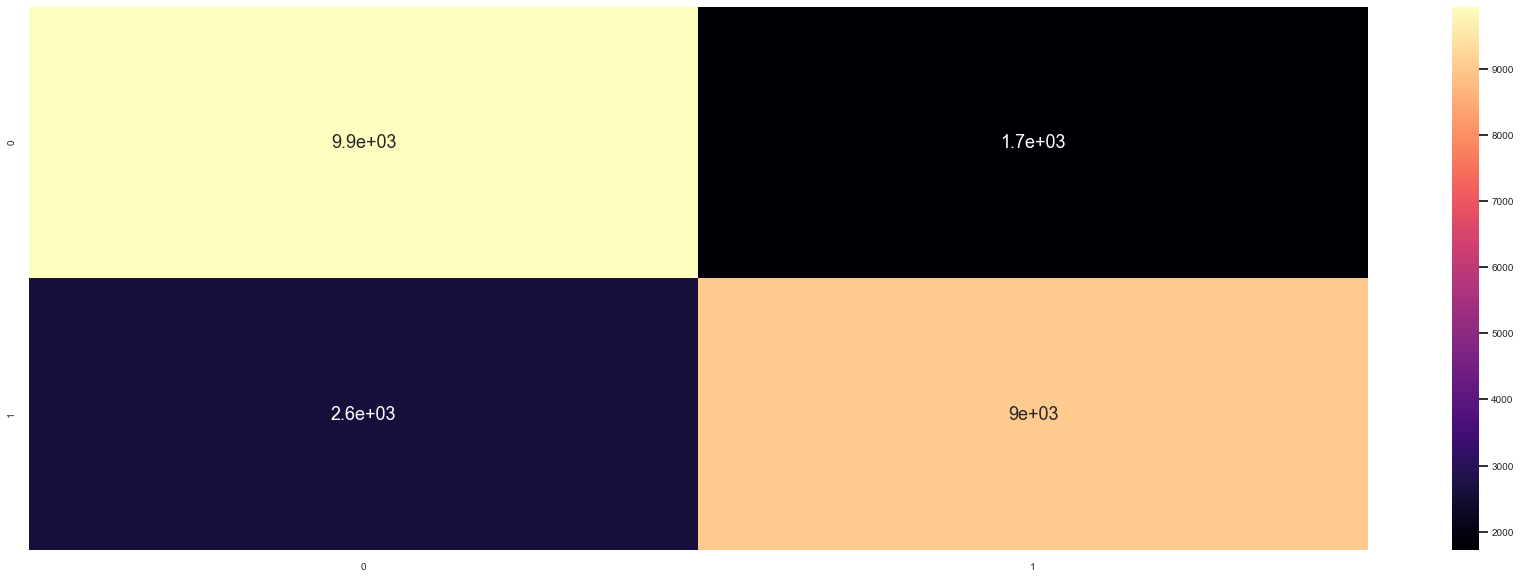

In [37]:
#  Random Forest Classifier Results

pred_pb=rf_clf.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,pred_pb,pos_label=True)
auc = roc_auc_score(yc_test,pred_pb)

print(" ROC_AUC score is ",auc)
print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("Precision is : " ,precision_score(yc_test, yc_pred))
print("Recall is: " ,recall_score(yc_test, yc_pred))
print("F1 Score is : " ,f1_score(yc_test, yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

#Plotting confusion matrix
cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

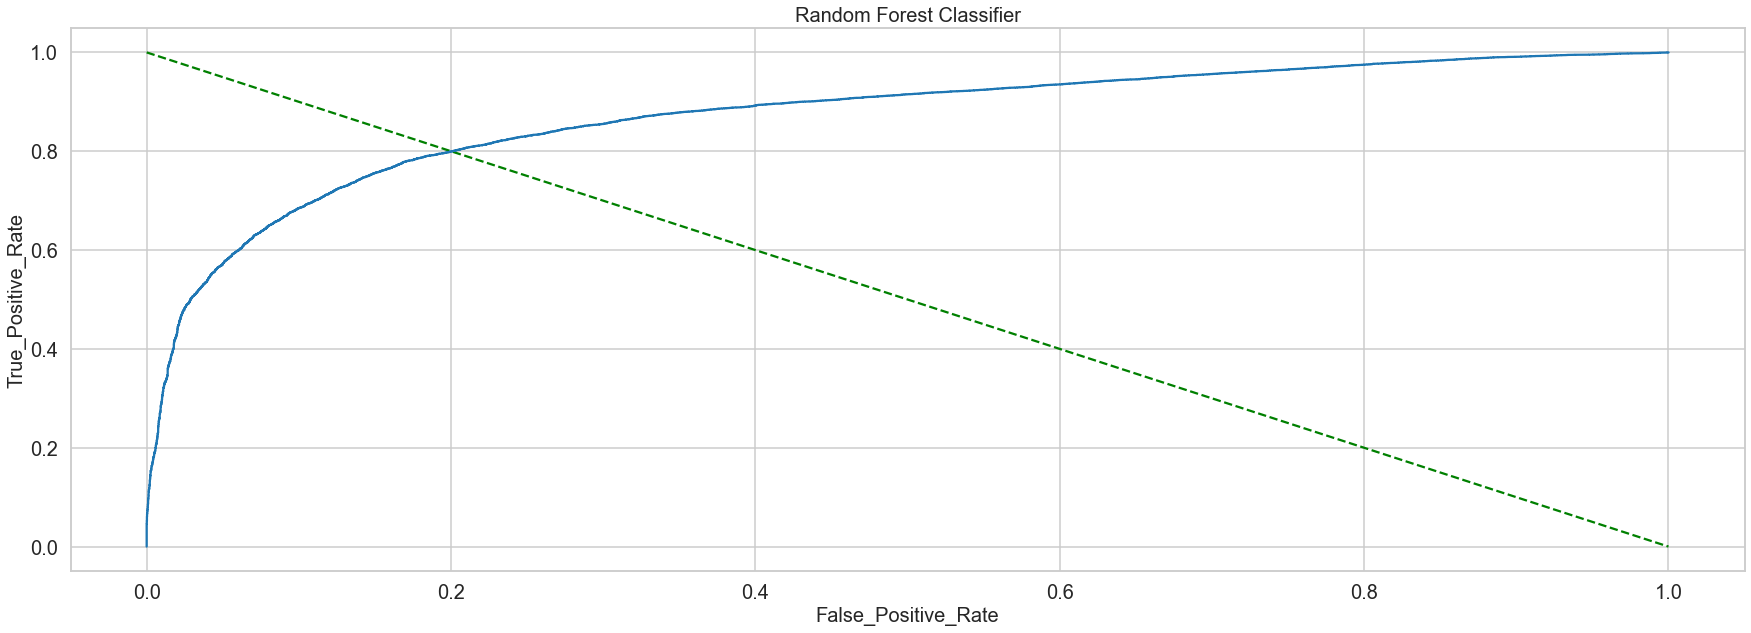

In [62]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("Random Forest Classifier")
plt.show()

+ Diambil variabel output sebagai Is_Lead (diubah menjadi nilai probablistik antara 1 dan 0)

+ model dasar yang dipilih adalah Hutan Acak (dipilih berdasarkan skor aoc_roc) yang memberikan skor ROC maks 0,91

+ Garis AOC/ROC yang diplot menunjukkan kecocokan yang baik antara nilai pengujian dan prediksi.

+ Matriks kebingungan juga diplot, Kecocokan model keseluruhan baik.

+ Namun, karena probabilitas yang diprediksi dimaksudkan dalam model RF hingga 2 tempat desimal, skor AUC yang dihasilkan dengan data uji ditemukan ~ 0,85

# Second Attempt: XG Boost Classifer

Untuk meningkatkan akurasi dan skor roc_auc . Saya mencoba menggunakan XG Boost Classifier karena secara inheren cocok untuk masalah klasifikasi ketidakseimbangan

In [41]:
#Trying XGBoost
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.utils import class_weight

clf2 = xg.XGBClassifier(class_weight='balanced').fit(xc_train, yc_train)
class_weight.compute_class_weight('balanced', np.unique(yc_train), yc_train["Is_Lead"])
xg_pred = clf2.predict(xc_test)


[07:32:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:32:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 ROC_AUC score is  0.8706238059470456
accuracy score is :  0.8033968090581575
Precision is :  0.8246741325500275
Recall is:  0.7706296105678504
F1 Score is :  0.7967364313586378
classification report 
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     11658
         1.0       0.82      0.77      0.80     11658

    accuracy                           0.80     23316
   macro avg       0.80      0.80      0.80     23316
weighted avg       0.80      0.80      0.80     23316



<AxesSubplot:>

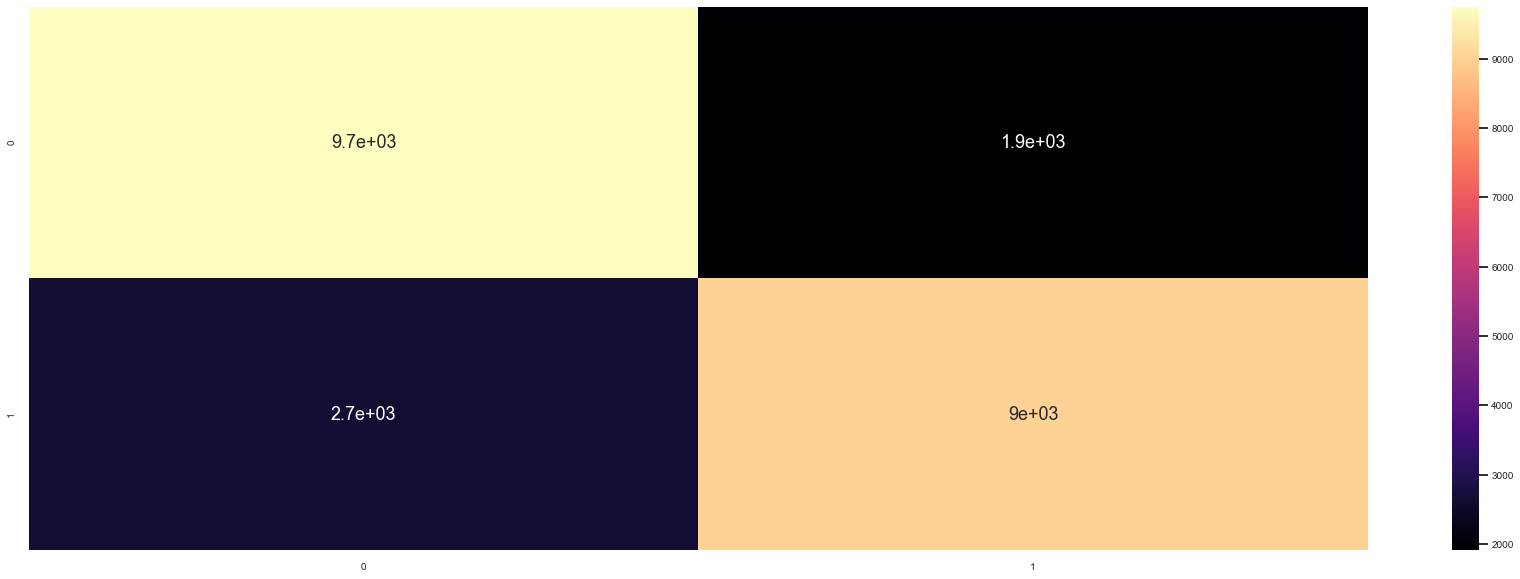

In [42]:
#XG Boost Results
xg_pred_2=clf2.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,xg_pred_2,pos_label=True)
auc = roc_auc_score(yc_test,xg_pred_2)

print(" ROC_AUC score is ",auc)
print("accuracy score is : ",accuracy_score(yc_test,xg_pred))
print("Precision is : " ,precision_score(yc_test, xg_pred))
print("Recall is: " ,recall_score(yc_test, xg_pred))
print("F1 Score is : " ,f1_score(yc_test, xg_pred))
print("classification report \n",classification_report(yc_test,xg_pred))

cnf = confusion_matrix(yc_test,xg_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

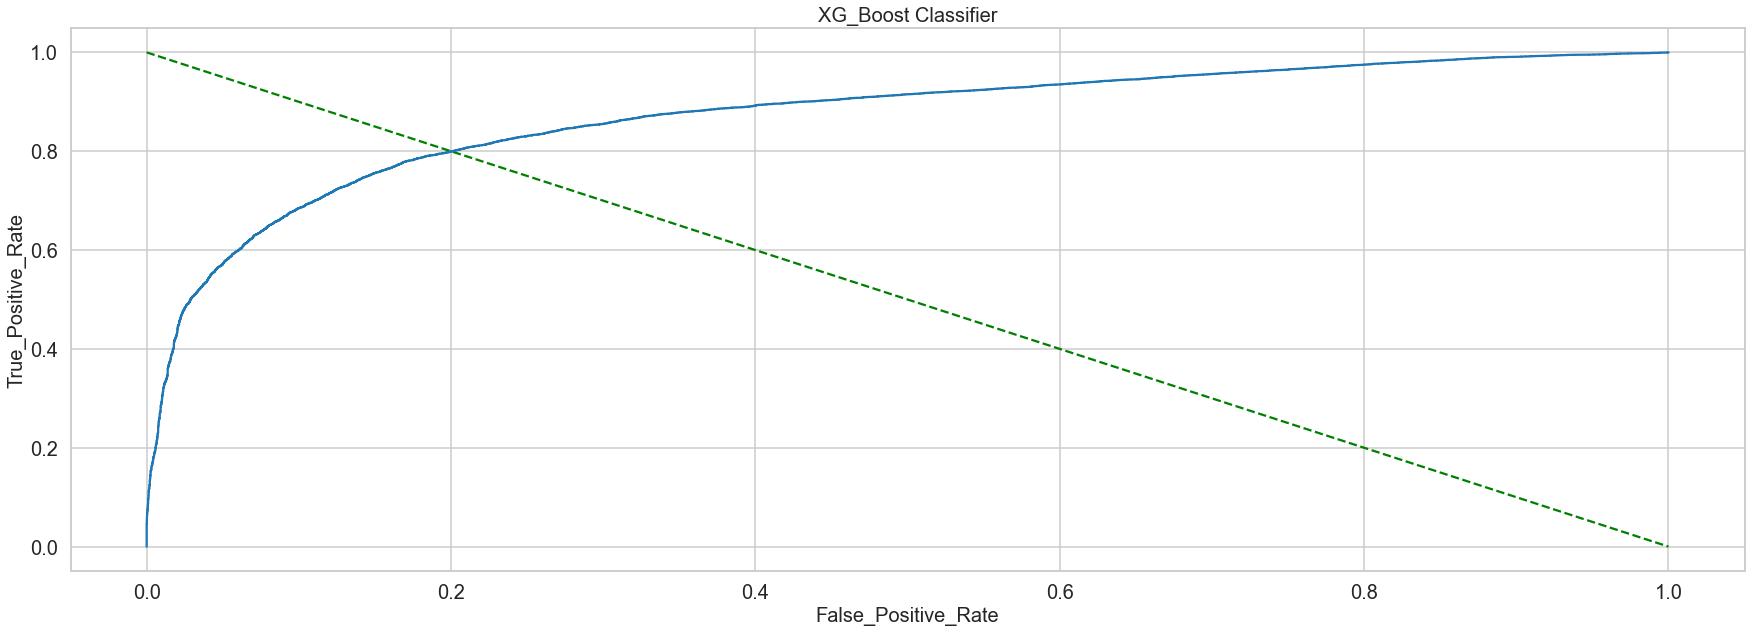

In [63]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("XG_Boost Classifier")
plt.show()

+ Diambil variabel output sebagai Is_Lead (diubah menjadi nilai probablistik antara 1 dan 0)

+ model dasar yang dipilih adalah XG Boost Classifer yang dipilih untuk meningkatkan akurasi dalam program klasifikasi kelas tidak seimbang.

+ Garis AOC/ROC yang diplot menunjukkan kecocokan yang baik antara nilai pengujian dan prediksi.

+ Skor ROC maks adalah 0,87, Kecocokan model secara keseluruhan baik.

+ Namun, skor auc boost XG dengan data pengujian turun menjadi ~ 0,86 karena masalah overfitting.

# Third Attempt: LGBM Model with Stratification Folds

Untuk menghindari masalah overfitting dalam dataset. Saya memutuskan untuk menerapkan lipatan stratifikasi dan juga menggunakan model LGB untuk menemukan probabilitas berdasarkan klasifikasi.

1

In [44]:
#Trying stratification modeling
from sklearn.model_selection import KFold, StratifiedKFold

def cross_val(xc, yc, model, params, folds=10):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(skf.split(xc, yc)):
        print(f"Fold: {fold}")
        xc_train, yc_train = xc.iloc[train_idx], yc.iloc[train_idx]
        xc_test, yc_test = xc.iloc[test_idx], yc.iloc[test_idx]

        model_c= model(**params)
        model_c.fit(xc_train, yc_train,eval_set=[(xc_test, yc_test)],early_stopping_rounds=100, verbose=300)

        pred_y = model_c.predict_proba(xc_test)[:, 1]
        roc_score = roc_auc_score(yc_test, pred_y)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return model_c

In [47]:
#Applying LGBM Model with 10 stratified cross-folds
from lightgbm import LGBMClassifier

lgb_params= {'learning_rate': 0.045, 'n_estimators': 10000,'max_bin': 84,'num_leaves': 10,'max_depth': 20,'reg_alpha': 8.457,'reg_lambda': 6.853,'subsample': 0.749}
lgb_model = cross_val(xc, yc, LGBMClassifier, lgb_params)

Fold: 0
[300]	valid_0's binary_logloss: 0.433821
[600]	valid_0's binary_logloss: 0.433498
roc_auc_score: 0.8748638095718249
--------------------------------------------------
Fold: 1
[300]	valid_0's binary_logloss: 0.434881
[600]	valid_0's binary_logloss: 0.43445
roc_auc_score: 0.8755631159104413
--------------------------------------------------
Fold: 2
[300]	valid_0's binary_logloss: 0.431872
[600]	valid_0's binary_logloss: 0.43125
[900]	valid_0's binary_logloss: 0.430984
roc_auc_score: 0.877077541404848
--------------------------------------------------
Fold: 3
[300]	valid_0's binary_logloss: 0.442048
[600]	valid_0's binary_logloss: 0.44142
[900]	valid_0's binary_logloss: 0.441142
roc_auc_score: 0.8721270953106521
--------------------------------------------------
Fold: 4
[300]	valid_0's binary_logloss: 0.439466
[600]	valid_0's binary_logloss: 0.438899
roc_auc_score: 0.8709229804739002
--------------------------------------------------
Fold: 5
[300]	valid_0's binary_logloss: 0.42754

 ROC_AUC score is  0.8706238059470456
accuracy score is :  0.8030965860353405
Precision is :  0.8258784469242829
Recall is:  0.7681420483787956
F1 Score is :  0.7959646237944981
classification report 
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     11658
         1.0       0.83      0.77      0.80     11658

    accuracy                           0.80     23316
   macro avg       0.80      0.80      0.80     23316
weighted avg       0.80      0.80      0.80     23316



<AxesSubplot:>

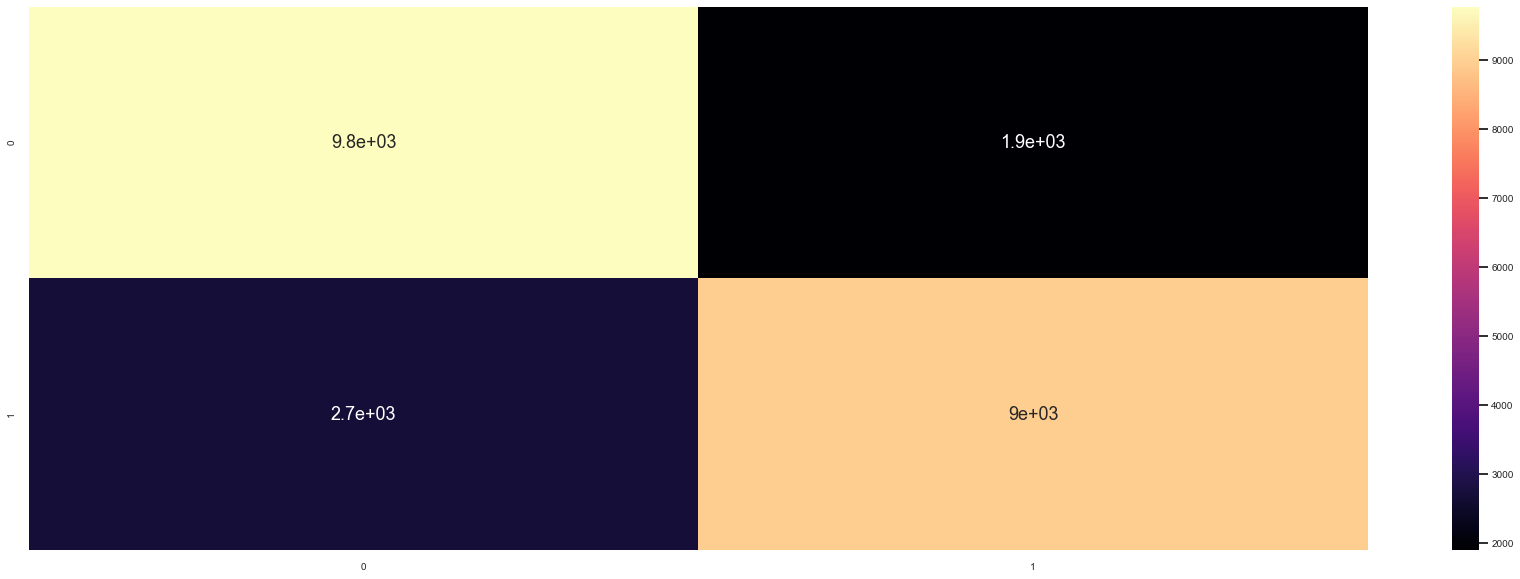

In [48]:
#LGBM results
lgb_pred_2=clf2.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,lgb_pred_2,pos_label=True)
auc = roc_auc_score(yc_test,lgb_pred_2)

print(" ROC_AUC score is ",auc)
lgb_model.fit(xc_train,yc_train)
lgb_pred=lgb_model.predict(xc_test)
print("accuracy score is : ",accuracy_score(yc_test,lgb_pred))
print("Precision is : " ,precision_score(yc_test, lgb_pred))
print("Recall is: " ,recall_score(yc_test, lgb_pred))
print("F1 Score is : " ,f1_score(yc_test, lgb_pred))
print("classification report \n",classification_report(yc_test,lgb_pred))

cnf = confusion_matrix(yc_test,lgb_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

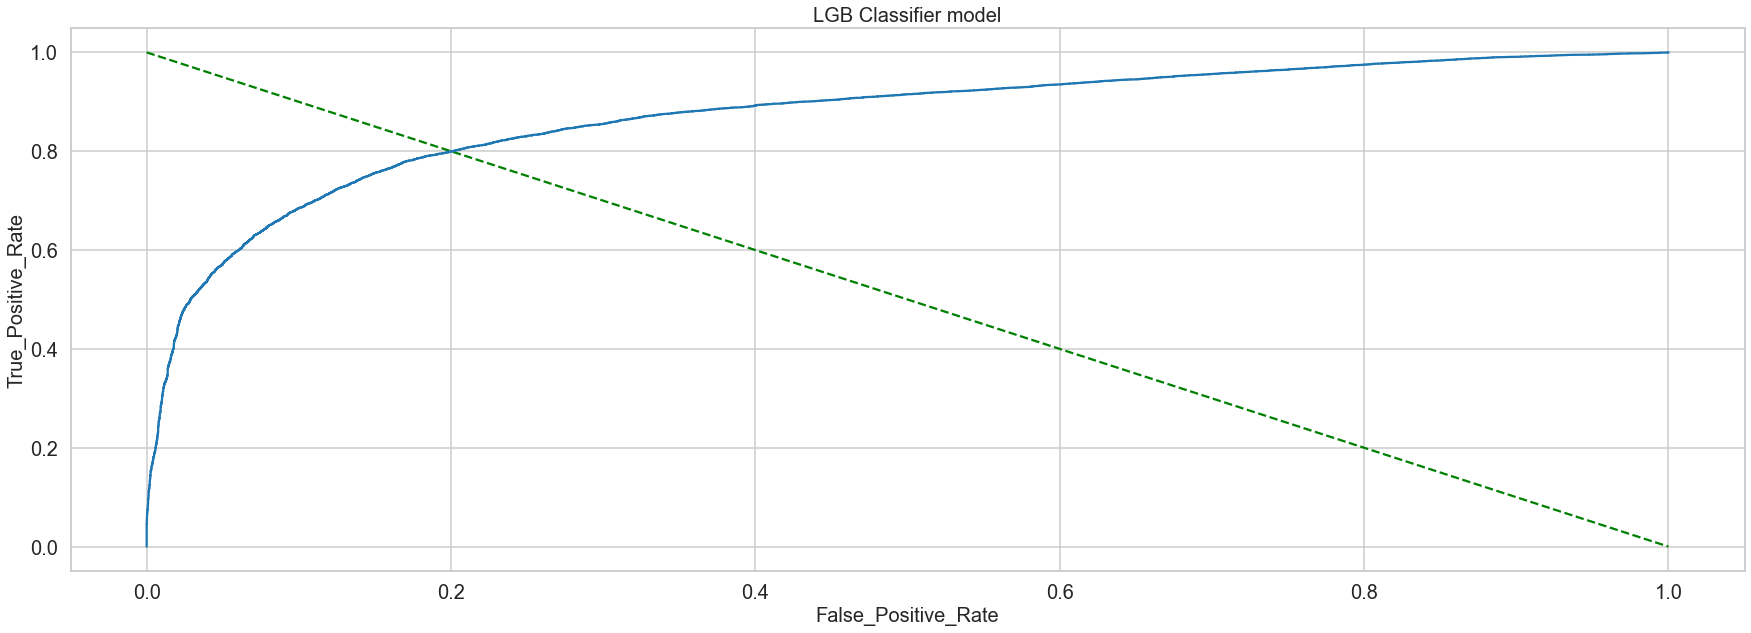

In [64]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("LGB Classifier model")
plt.show()

+ Diambil variabel output sebagai Is_Lead (diubah menjadi nilai probablistik antara 1 dan 0)

+ model dasar yang dipilih adalah model pengklasifikasi LGBM beserta validasi silang bertingkat 10 folds.

+ Ini dilakukan untuk menghilangkan masalah overfitting dalam model.

+ Garis AOC/ROC yang diplot menunjukkan kecocokan yang baik antara nilai pengujian dan prediksi.

+ Skor ROC maks adalah 0,874

# 5. Prediction

## Preparing Dataset for prediction

In [51]:
#we can drop column as they are irrelevant and have no effect on our data
df_3 = df_test

In [52]:
df_3.drop(columns=["source"],inplace=True)
df_3.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245725,VBENBARO,1,29,4,1,0,25,2,742366,0.0,NaN
245726,CCMEWNKY,1,43,18,1,1,49,0,925537,0.0,NaN
245727,VK3KGA9M,1,31,20,2,0,14,1,215949,0.0,NaN
245728,TT8RPZVC,1,29,22,1,0,33,1,868070,0.0,NaN
245729,SHQZEYTZ,0,29,20,1,0,19,1,657087,0.0,NaN


In [53]:
# dropping target variable 
#assign the value of y for training and testing phase
xc_pred = df_3.drop(columns=['Is_Lead',"ID"])

#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_xc_pred = pd.DataFrame(sc.fit_transform(xc_pred),columns=xc_pred.columns)

In [54]:
lead_pred_xg=clf2.predict_proba(df_xc_pred)[:,1]
lead_pred_lgb=lgb_model.predict_proba(df_xc_pred)[:,1]
lead_pred_rf=rf_clf.predict_proba(df_xc_pred)[:,1]
print(lead_pred_xg, lead_pred_lgb, lead_pred_rf)

[0.09673516 0.9428428  0.12728807 ... 0.31698707 0.1821623  0.17593904] [0.14278614 0.94357392 0.13603912 ... 0.22251432 0.24186564 0.16873483] [0.17 0.97 0.09 ... 0.5  0.09 0.15]


In [55]:
#Dataframe for lead prediction
lead_pred_lgb= pd.DataFrame(lead_pred_lgb,columns=["Is_Lead"])
lead_pred_xg= pd.DataFrame(lead_pred_xg,columns=["Is_Lead"])
lead_pred_rf= pd.DataFrame(lead_pred_rf,columns=["Is_Lead"])

In [56]:
df_test = df_test.reset_index()
df_test.head()

,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,245725,VBENBARO,1,29,4,1,0,25,2,742366,0.0,NaN
1,245726,CCMEWNKY,1,43,18,1,1,49,0,925537,0.0,NaN
2,245727,VK3KGA9M,1,31,20,2,0,14,1,215949,0.0,NaN
3,245728,TT8RPZVC,1,29,22,1,0,33,1,868070,0.0,NaN
4,245729,SHQZEYTZ,0,29,20,1,0,19,1,657087,0.0,NaN


In [57]:
#Saving ID  and prediction to csv file for XG Model
df_pred_xg=pd.concat([df_test["ID"],lead_pred_xg],axis=1,ignore_index=True)
df_pred_xg.columns = ["ID","Is_Lead"]
print(df_pred_xg.head())
df_pred_xg.to_csv("Credit_Card_Lead_Predictions_final_xg.csv",index=False)

#Saving ID  and prediction to csv file for LGB Model
df_pred_lgb=pd.concat([df_test["ID"],lead_pred_lgb],axis=1,ignore_index=True)
df_pred_lgb.columns = ["ID","Is_Lead"]
print(df_pred_lgb.head())
df_pred_lgb.to_csv("Credit_Card_Lead_Predictions_final_lgb.csv",index=False)

#Saving ID  and prediction to csv file for RF model
df_pred_rf=pd.concat([df_test["ID"],lead_pred_rf],axis=1,ignore_index=True)
df_pred_rf.columns = ["ID","Is_Lead"]
print(df_pred_rf.head())
df_pred_rf.to_csv("Credit_Card_Lead_Predictions_final_rf.csv",index=False)

         ID   Is_Lead
0  VBENBARO  0.096735
1  CCMEWNKY  0.942843
2  VK3KGA9M  0.127288
3  TT8RPZVC  0.052260
4  SHQZEYTZ  0.057762
         ID   Is_Lead
0  VBENBARO  0.142786
1  CCMEWNKY  0.943574
2  VK3KGA9M  0.136039
3  TT8RPZVC  0.084144
4  SHQZEYTZ  0.055887
         ID  Is_Lead
0  VBENBARO     0.17
1  CCMEWNKY     0.97
2  VK3KGA9M     0.09
3  TT8RPZVC     0.12
4  SHQZEYTZ     0.09


+ Data berisi data kategorikal dan numerik. Kategori yang dikonversi menjadi numerik untuk analisis EDA.

+ Juga dilakukan analisis visual untuk mengamati hal-hal berikut:

    + Pelanggan IndentActive lebih banyak bergaji, berwiraswasta dan lain-lain dibandingkan dengan pengusaha dalam 3 bulan terakhir.
    + Data miring ke kiri di Avg_Account_Balance
    + Variabel Target tidak seimbang dan perlu dikoreksi untuk pemodelan yang tepat.
+ Dataset diseimbangkan dengan menggunakan teknik undersampling.

+ Pengklasifikasi Hutan Acak:

    + Model RandomForest yang ditemukan memiliki skor AUC tertinggi (0,91) di antara berbagai model dasar.
    + Namun, karena probabilitas yang diprediksi dimaksudkan dalam model RF hingga 2 tempat desimal, skor AUC yang dihasilkan dengan data uji ditemukan ~ 0,85
+ Pengklasifikasi Peningkatan XG:

    + Untuk lebih meningkatkan akurasi metode XG Boost digunakan dan skor AUC 0,87 ditemukan dengan data pelatihan.
    + Namun, skor auc boost XG dengan data pengujian turun menjadi ~ 0,86 karena masalah overfitting.
+ LGBM Classifier dengan validasi silang bertingkat:

    + Untuk mengatasi masalah overfitting, model LGBM dengan validasi silang 10 kali lipat digunakan dan skor AUC 0,874 dengan data pelatihan.
    + Model berkinerja sangat baik dengan data uji dan memberikan skor auc ~0,871
Oleh karena itu, model terakhir dipilih sebagai model LGBM karena merupakan model yang paling konsisten dengan nilai AUC tertinggi.